Companies can generate more revenue by:
1. Upselling to existing customers
2. Acquiring new customers
3. Increase customer retention

Customer churn out predicts customer who are likely to cancel their subscription so businesses can offer them new deals/offers/discounts. So this project will focus on part 3.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [65]:
df = pd.read_csv('Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
pandas_profiling.profile_report.ProfileReport(df)

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [66]:
df.shape

(7043, 21)

In [67]:
df['Churn'].replace('No',0,inplace=True)
df['Churn'].replace('Yes',1,inplace=True)

In [68]:
col = ['OnlineBackup','StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity','StreamingTV']
for i in col:
    df[i].replace('No internet service','No',inplace=True)

In [69]:
df['TotalCharges'].replace(' ',0,inplace=True)
df['TotalCharges']=df['TotalCharges'].astype(float)

In [70]:
df['TotalCharges'].replace(0,np.median(df['TotalCharges']),inplace=True)

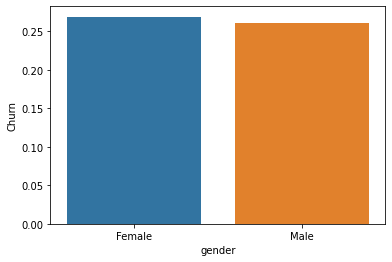

In [71]:
plot_by_gender = df.groupby('gender').Churn.mean().reset_index()
import seaborn as sns
ax = sns.barplot(x="gender", y="Churn", data=plot_by_gender)

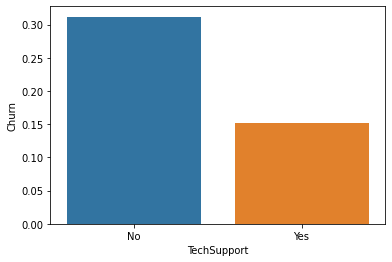

In [72]:
plot_by_techsupport = df.groupby('TechSupport').Churn.mean().reset_index()
ax = sns.barplot(x="TechSupport", y="Churn", data=plot_by_techsupport)

Customers who do not request techsupport are more likely to get churned out

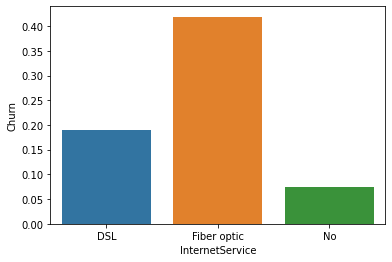

In [73]:
plot_by_internet = df.groupby('InternetService').Churn.mean().reset_index()
ax = sns.barplot(x="InternetService", y="Churn", data=plot_by_internet)

Customers who use FibreOptic are more likely to get churned out reason could be poor service, competition,etc.

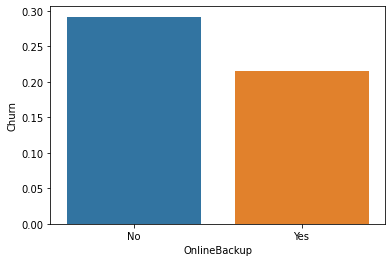

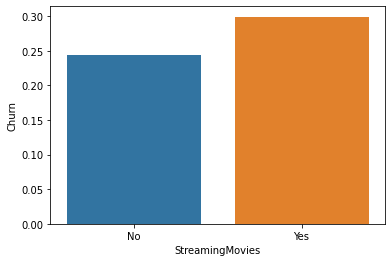

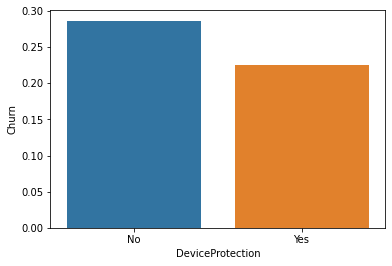

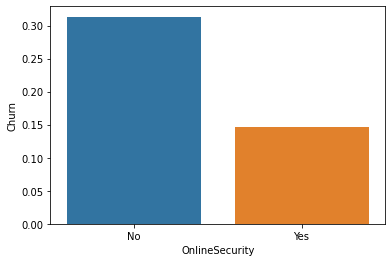

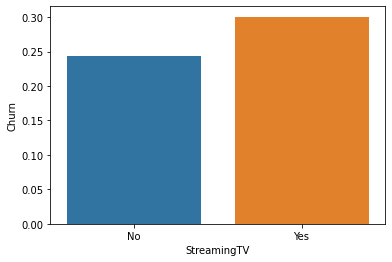

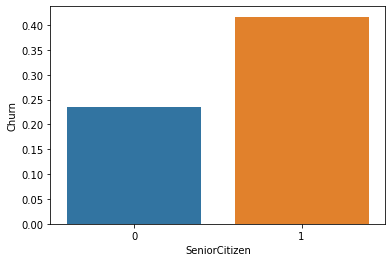

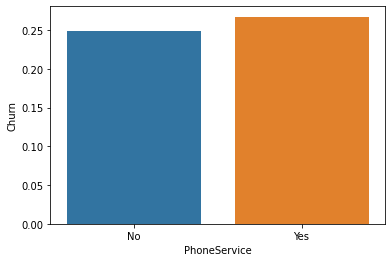

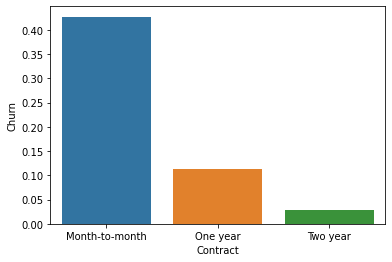

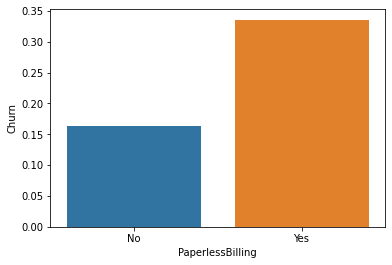

In [74]:
col = ['OnlineBackup','StreamingMovies','DeviceProtection','OnlineSecurity','StreamingTV','SeniorCitizen','PhoneService','Contract','PaperlessBilling']
for i in col:
    plot = df.groupby(i).Churn.mean().reset_index()
    ax = sns.barplot(x=i, y="Churn", data=plot)
    plt.show()

In [75]:
col = ['Partner','Dependents','OnlineBackup','StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity','StreamingTV','PhoneService','PaperlessBilling']
for i in col:
    df[i].replace('No',0,inplace=True)
    df[i].replace('Yes',1,inplace=True)

In [76]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [77]:
#One hot encoding
df = pd.get_dummies(df, columns = ['Contract','gender','InternetService','MultipleLines','PaymentMethod'],drop_first=True)

In [78]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,1,0,0,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,1,0,0,1,0,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,1,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,1,0,0,0,1,0,0,0,0,1,0


In [79]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = ['tenure','MonthlyCharges','TotalCharges']
df[col]=scaler.fit_transform(df[col])
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,-1.277445,0,0,1,0,0,0,0,1,-1.160323,-0.994239,0,0,0,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,0,0,0.066327,1,1,0,1,0,0,0,0,-0.259629,-0.173242,0,1,0,1,0,0,0,0,0,0,1
2,3668-QPYBK,0,0,0,-1.236724,1,1,1,0,0,0,0,1,-0.362660,-0.959671,1,0,0,1,0,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0.514251,0,1,0,1,1,0,0,0,-0.746535,-0.194764,0,1,0,1,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,-1.236724,1,0,0,0,0,0,0,1,0.197365,-0.940467,1,0,0,0,1,0,0,0,0,1,0


In [91]:
#Create Feature variable X and Target variable y
y = df['Churn']
X = df.drop(['Churn','customerID','gender_Male'], axis = 1)

In [92]:
#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 17)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [94]:
#Logistic model
log_model = LogisticRegression(random_state=17)
log_model.fit(X_train,y_train)

#Predict the value for new, unseen data
pred = log_model.predict(X_test)

# Find Accuracy using accuracy_score method
log_model_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)

In [95]:
#Fit the Support Vector Machine Model
svc_model = SVC(kernel='linear', random_state=17, probability=True)
svc_model.fit(X_train,y_train)

#Predict the value for new, unseen data
svc_pred = svc_model.predict(X_test)

# Find Accuracy using accuracy_score method
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)

In [96]:
#Fit the K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 represents Euclidean distance, p=1 represents Manhattan Distance
knnmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
knn_pred = knnmodel.predict(X_test)

# Find Accuracy using accuracy_score method
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)

In [97]:
#Fit the Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion = "gini", random_state = 50)
dtmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
dt_pred = dtmodel.predict(X_test)

# Find Accuracy using accuracy_score method
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)

In [98]:
#Fit the Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
rf_pred = rfmodel.predict(X_test)

# Find Accuracy using accuracy_score method
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)

In [99]:
# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest'],
    'Score': [log_model_accuracy, svc_accuracy, knn_accuracy, 
              dt_accuracy, rf_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,79.79,Logistic Regression
1,78.61,Support Vector Machine
2,78.47,Random Forest
3,75.58,K-Nearest Neighbor
4,72.93,Decision Tree


In [100]:
#Generate confusion matrix for logistics regression model as it has maximum Accuracy
from sklearn.metrics import confusion_matrix
conf_mat_logmodel = confusion_matrix(y_test,pred)
conf_mat_logmodel

array([[1391,  148],
       [ 279,  295]], dtype=int64)

In [101]:
# Predict the probability of Churn of each customer
df['Probability_of_Churn'] = log_model.predict_proba(df[X_test.columns])[:,1]

In [102]:
df[['customerID','Probability_of_Churn']].sort_values(by='Probability_of_Churn',ascending=False).head(10)

,customerID,Probability_of_Churn
1976,9497-QCMMS,0.848918
4800,9300-AGZNL,0.848561
3749,4424-TKOPW,0.845464
6368,2720-WGKHP,0.844631
1410,7024-OHCCK,0.844250
3159,5150-ITWWB,0.843037
997,1374-DMZUI,0.839523
301,8098-LLAZX,0.837131
1600,3068-OMWZA,0.833421
2208,7216-EWTRS,0.832464


These are the top 10 customers who are most likely to get churned out